# Welcome to the Disc Recommendation Tool.
## This tool will provide 10 discs that are similar to a disc model you input.
## 



-------------------------------------------------
*****	Welcome to the Disc Recommender!	*****
-------------------------------------------------

	This system recommends the top 10 comparable discs based on their flight characteristics and disc type.

		Enter a disc by model name: 
buzzz
buzzz
           MOLD
471      anubis
480       berry
491    claymore
492       cobra
506     element
522         hex
541  m model us
545          m4
550       mako3
555          md
Manufacturer | Mold | Speed | Glide | Turn | Fade | Stability
-------------------------------------------------
Showing the top 10 recommendations similar to the:
 Discraft | Buzzz | 5.0 | 4.0 | -1.0 | 1.0 | 0.0

		** DISC RECOMMENDATIONS **
1. Infinite Discs | Anubis | 5.0 | 5.0 | 0.0 | 0.0 | 0.0
2. Glash Discs | Berry | 5.0 | 5.0 | -1.0 | 1.0 | 0.0
3. Latitute 64 | Claymore | 5.0 | 5.0 | -1.0 | 1.0 | 0.0
4. Innova | Cobra | 4.0 | 5.0 | -2.0 | 2.0 | 0.0
5. Gateway Discs | Element | 5.0 | 5.0 | -1.0 | 1.0 | 0.0
6. Axiom Di

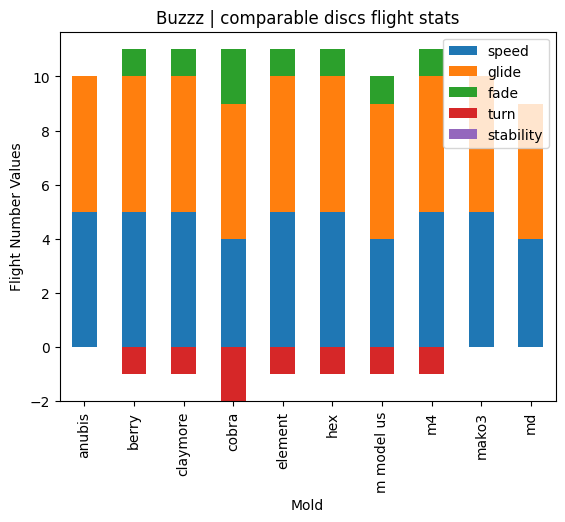

Compare another disc?	Enter Y or N
n

Thank you for using the Disc Recommender!

The following graphs show how the recommender works by comparing similarity scores.

The following histogram shows the cosine similarity scores for the entire disc dataset.
The score on the y-axis represents the of number of comparables in 10,000s.
The score on the x-axis represents the cosine similarity score from 0 to 1 with 1 being a perfect match.
From this data we can see that there are many discs that are not very comparable and fewer that are comparable.
With this data we can find discs that are comparable to one that you may already like.



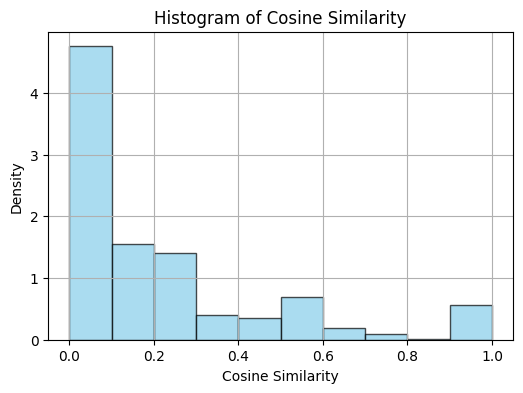

The following Heatmap displays a sample of 10 discs compared to the entire dataset of discs.
The color intensity represents the degree of similarity, with lighter colors indicating greater similarity.



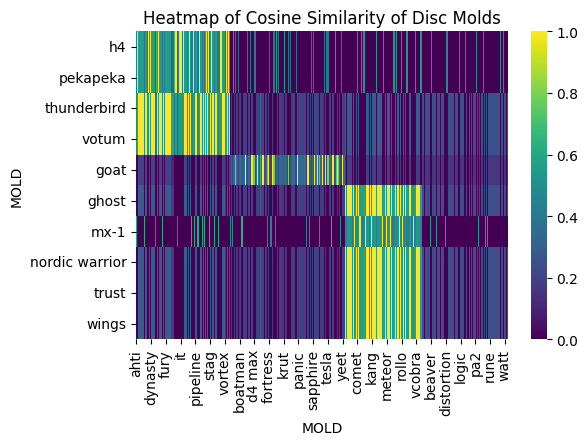

SystemExit: 

In [4]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys

# Function to classify disc types for comparison
def classify_disc(disc):
    discToClassify = dfDisc.loc[dfDisc['MOLD'] == disc]
    discType = dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE']
    discStability = dfDisc.at[int(discToClassify.index[0]), 'STABILITY']
    discSpeed = dfDisc.at[int(discToClassify.index[0]), 'SPEED']
    # Classify disc based on type, stability, and speed
    if 'putt&approach' in str(discToClassify[['DISC TYPE']]):
        if discStability > 3.0:
            if discSpeed > 2:
                dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'veryoverstable approach'
            else:
                dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'veryoverstable putter'
        elif discStability > 0.0 and discStability <= 3.0:
            if discSpeed > 2:
                dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'overstable approach'
            else:
                dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'overstable putter'
        elif discStability == 0:
            if discSpeed > 2:
                dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'straight approach'
            else:
                dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'straight putter'
        else:
            if discSpeed > 2:
                dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'understable approach'
            else:
                dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'understable putter'
        discType = dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE']
    if 'midrange' in str(discToClassify[['DISC TYPE']]):
        if discStability > 3.0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'veryoverstable midrange'
        elif discStability > 0.0 and discStability <= 3.0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'overstable midrange'
        elif discStability == 0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'straight midrange'
        else:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'understable midrange'
        discType = dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE']
    if 'controldriver' in str(discToClassify[['DISC TYPE']]):
        if discStability > 3.0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'veryoverstable controldriver'
        elif discStability > 0.0 and discStability <= 3.0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'overstable controldriver'
        elif discStability == 0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'straight controldriver'
        else:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'understable controldriver'
        discType = dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE']
    if 'distancedriver' in str(discToClassify[['DISC TYPE']]):
        if discStability > 3.0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'veryoverstable distancedriver'
        elif discStability > 0.0 and discStability <= 3.0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'overstable distancedriver'
        elif discStability == 0:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'straight distancedriver'
        else:
            dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE'] = 'understable distancedriver'
        discType = dfDisc.at[int(discToClassify.index[0]), 'DISC TYPE']
    return discType

# Function to get disc manufacturer
def get_disc_mfg(disc):
    disc1 = clean_data(disc)
    d = dfDisc.loc[dfDisc['MOLD'] == disc1]
    discMfg = dfDisc.at[int(d.index[0]), 'Manufacturer']
    return discMfg

# Function to clean data
def clean_data(data):
    clean = str(data).lower()
    return (clean.replace(' ', ''))

# Function to get disc details
def get_disc_details(disc):
    disc = str(disc).strip('[').strip(']').strip("'")
    disc1 = clean_data(disc)
    d = dfDisc.loc[dfDisc['MOLD'] == disc1]
    discMfg = dfDisc.at[int(d.index[0]), 'Manufacturer']
    discMold = dfDisc.at[int(d.index[0]), 'MOLD']
    discSpeed = dfDisc.at[int(d.index[0]), 'SPEED']
    discGlide = dfDisc.at[int(d.index[0]), 'GLIDE']
    discTurn = dfDisc.at[int(d.index[0]), 'TURN']
    discFade = dfDisc.at[int(d.index[0]), 'FADE']
    discStability = dfDisc.at[int(d.index[0]), 'STABILITY']
    discDetails = str(
        '' + discMfg + ' | ' + discMold.capitalize() + ' | ' + str(discSpeed) + ' | ' + str(discGlide) + ' | ' + str(
            discTurn) + ' | ' + str(discFade) + ' | ' + str(discStability))
    return discDetails

# Function to create recommended discs dataframe based on input disc
def disc_recommendations(disc):
    discToComp = disc.lower()
    print(disc)
    try:
        # Get top 10 recommended discs based on cosine similarity
        recommendations = pd.DataFrame(df2.nlargest(11, discToComp)['MOLD'])
        recommendations = recommendations[recommendations['MOLD'] != discToComp]
        print(recommendations)
    except:
        return
    return recommendations

# main function to collect user input and run the recommender function and display top 10 discs and bar graph
def main():
    input_disc = input("\t\tEnter a disc by model name: \n")
    disc_recs = disc_recommendations(input_disc)
    try:
        dr = disc_recs.values.astype(str).tolist()
        i = 0

        print('Manufacturer | Mold | Speed | Glide | Turn | Fade | Stability\n-------------------------------------------------')
        print('Showing the top 10 recommendations similar to the:\n {}'.format(get_disc_details(input_disc)))
        print('\n\t\t** DISC RECOMMENDATIONS **')
        for d in dr:
            disc = str(dr[i]).strip('[').strip(']').strip("'")
            disc_details = get_disc_details(disc)
            print(('{}. ' + disc_details).format(i + 1))
            i = i + 1
    except:
        # Handle invalid disc model input
        input_disc = input("Invalid disc model. Please enter a new disc.\n")
        main()

    finally:
        # Extracting relevant columns from df for bar graph
        d_speed = df[['MOLD', 'SPEED']]
        d_glide = df[['MOLD', 'GLIDE']]
        d_fade = df[['MOLD', 'FADE']]
        d_turn = df[['MOLD', 'TURN']]
        d_stability = df[['MOLD', 'STABILITY']]

        # Setting 'MOLD' column as index
        d_speed.set_index('MOLD', inplace=True)
        d_glide.set_index('MOLD', inplace=True)
        d_fade.set_index('MOLD', inplace=True)
        d_turn.set_index('MOLD', inplace=True)
        d_stability.set_index('MOLD', inplace=True)

        # Extracting the indices of recommended discs
        idx = disc_recs['MOLD']

        # Creating a DataFrame for plotting
        bar_df = pd.DataFrame(
            {'speed': d_speed['SPEED'], 'glide': d_glide['GLIDE'], 'fade': d_fade['FADE'], 'turn': d_turn['TURN'],
             'stability': d_stability['STABILITY']}, index=idx)

        # Plotting the bar graph
        bar_graph_comps = bar_df.plot(kind='bar',
                                      title='{} | Comparable Discs Flight Stats'.format(input_disc).capitalize(),
                                      stacked=True)
        bar_graph_comps.set_xlabel('Mold')
        bar_graph_comps.set_ylabel('Flight Number Values')
        plt.show()
    # Ask the user if they want to compare another disc
    userInput = input('Compare another disc?\tEnter Y or N\n')
    userInput = userInput.upper()
    if userInput == 'Y':
        main()
    else:
        print('\nThank you for using the Disc Recommender!\n')
        print('The following graphs show how the recommender works by comparing similarity scores.\n')
        print('The following histogram shows the cosine similarity scores for the entire disc dataset.\n'
            'The score on the y-axis represents the of number of comparables in 10,000s.\n'
            'The score on the x-axis represents the cosine similarity score from 0 to 1 with 1 being a perfect match.\n'
            'From this data we can see that there are many discs that are not very comparable and fewer that are comparable.\n'
            'With this data we can find discs that are comparable to one that you may already like.\n')
        # Plot the histogram
        plt.figure(figsize=(6, 4))
        plt.hist(cosSim_values, bins=10, color='skyblue', edgecolor='black', alpha=0.7, density=True)
        plt.title('Histogram of Cosine Similarity')
        plt.xlabel('Cosine Similarity')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()

        # Create dataframe for recommending discs
        df2 = pd.DataFrame(cosSim, columns=df['MOLD'], index=df['MOLD']).reset_index()
        # Select 10 random discs and create a dataframe of the selected subset
        rnd_discs_cs = np.random.choice(df2['MOLD'], size=10, replace=False)
        df2_subset = df2[df2['MOLD'].isin(rnd_discs_cs)].set_index('MOLD')
        # Create heatmap where each cell represents the cosine similarity between two molds.
        print('The following Heatmap displays a sample of 10 discs compared to the entire dataset of discs.\n'
              'The color intensity represents the degree of similarity, with lighter colors indicating greater similarity.\n')
        plt.figure(figsize=(6, 4))
        sns.heatmap(df2_subset, cmap='viridis')
        plt.title('Heatmap of Cosine Similarity of Disc Molds')
        plt.xlabel('MOLD')
        plt.ylabel('MOLD')
        plt.show()
        sys.exit()

print(
    '\n-------------------------------------------------\n*****\tWelcome to the Disc Recommender!\t*****\n-------------------------------------------------\n')
print('\tThis system recommends the top 10 comparable discs based on their flight characteristics and disc type.\n')

# Load disc data from CSV into a dataframe
df = pd.read_csv('disc-data-flight-numbers.csv')
# Preprocess the data
df['DISC TYPE'] = df['DISC TYPE'].apply(clean_data)
df['MOLD'] = df['MOLD'].str.lower()
dfDisc = df.drop(['DIAMETER (cm)', 'HEIGHT (cm)', 'RIM DEPTH (cm)', 'RIM WIDTH (cm)', 'INSIDE RIM DIAMETER (cm)',
                  'RIM DEPTH / DIAMETER RATION (%)', 'RIM CONFIGURATION', 'BEAD'], axis=1)
dfDisc['MOLD'] = dfDisc['MOLD'].apply(clean_data)
dfDisc['DISC TYPE'] = dfDisc['MOLD'].apply(classify_disc)
dfDisc['disc data'] = (dfDisc[dfDisc.columns[2:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1))
# Create dataframe for recommending discs
df2 = pd.DataFrame(cosSim, columns=df['MOLD'], index=df['MOLD']).reset_index()
# Vectorize the text data
vectorizer = TfidfVectorizer()
vectData = vectorizer.fit_transform(dfDisc['disc data'])
# Calculate cosine similarity
cosSim = cosine_similarity(vectData)
# Extract upper triangular part of the matrix not including the diagonal
cosSim_values = cosSim[np.triu_indices(len(cosSim), k=1)]

main()



